> Texto fornecido sob a Creative Commons Attribution license, CC-BY. Todo o código está disponível sob a FSF-approved BSD-3 license.<br>
> (c) Original por Lorena A. Barba, Gilbert F. Forsyth em 2017, traduzido por Felipe N. Schuch em 2020.<br>
> [@LorenaABarba](https://twitter.com/LorenaABarba) - [@fschuch](https://twitter.com/fschuch)

12 passos para Navier–Stokes
======
***

Este será um marco! Agora chegamos ao Passo 8: equação de Burgers. Podemos aprender muito mais com esta equação. Ela desempenha um papel muito importante na mecânica dos fluidos, porque contém a não linearidade convectiva completa das equações do escoamento e, ao mesmo tempo, existem muitas soluções analíticas conhecidas.

Passo 8: Equação de Burgers em 2D
----
***

Lembre-se, a equação de Burgers pode gerar soluções descontínuas a partir de uma condição inicial suave, ou seja, pode desenvolver "choques". Queremos ver isso em duas dimensões agora!

Aqui está o nosso conjunto acoplado de EDPs:

$$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right)$$

$$
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right)$$

Sabemos como discretizar cada termo: já fizemos isso antes!

$$
\begin{split}
& \frac{u_{i,j}^{n+1} - u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n - u_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{u_{i+1,j}^n - 2u_{i,j}^n+u_{i-1,j}^n}{\Delta x^2} + \frac{u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

$$
\begin{split}
& \frac{v_{i,j}^{n+1} - v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n - v_{i,j-1}^n}{\Delta y} = \\
& \qquad \nu \left( \frac{v_{i+1,j}^n - 2v_{i,j}^n+v_{i-1,j}^n}{\Delta x^2} + \frac{v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n}{\Delta y^2} \right)
\end{split}
$$

E agora, reorganizaremos cada uma dessas equações para a única incógnita: os dois componentes $ u, v $ da solução no passo de tempo subsequente:

$$
\begin{split}
u_{i,j}^{n+1} = & u_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (u_{i,j}^n - u_{i-1,j}^n)  - \frac{\Delta t}{\Delta y} v_{i,j}^n (u_{i,j}^n - u_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(u_{i+1,j}^n-2u_{i,j}^n+u_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (u_{i,j+1}^n - 2u_{i,j}^n + u_{i,j-1}^n)
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = & v_{i,j}^n - \frac{\Delta t}{\Delta x} u_{i,j}^n (v_{i,j}^n - v_{i-1,j}^n) - \frac{\Delta t}{\Delta y} v_{i,j}^n (v_{i,j}^n - v_{i,j-1}^n) \\
&+ \frac{\nu \Delta t}{\Delta x^2}(v_{i+1,j}^n-2v_{i,j}^n+v_{i-1,j}^n) + \frac{\nu \Delta t}{\Delta y^2} (v_{i,j+1}^n - 2v_{i,j}^n + v_{i,j-1}^n)
\end{split}
$$

In [1]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
###Declaração das variáveis
nx = 41
ny = 41
nt = 120
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .0009
nu = 0.01
dt = sigma * dx * dy / nu


x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((nx, ny))  ##Cria um vetor ny x nx com 1
v = numpy.ones((nx, ny))
un = numpy.ones((nx, ny)) 
vn = numpy.ones((nx, ny))
comb = numpy.ones((nx, ny))

###Assinala a condição Inicial

##CI função chapéu : u(0,5<=x<=1 && 0,5<=y<=1 ) is 2
u[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2
##CI função chapéu : v(0,5<=x<=1 && 0,5<=y<=1 ) is 2
v[int(.5 / dx):int(1 / dx + 1), int(.5 / dy):int(1 / dy + 1)] = 2

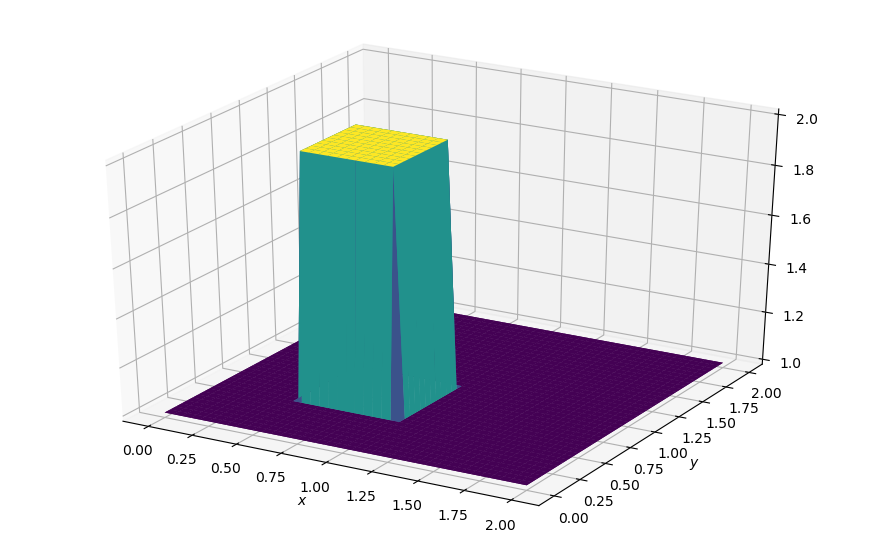

In [3]:
###(plot CIs)
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u[:].T, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v[:].T, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [4]:
for n in range(nt + 1): ##Laço temporal
    un = u.copy()
    vn = v.copy()

    u[1:-1, 1:-1] = (un[1:-1, 1:-1] -
                     dt / dx * un[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[0:-2, 1:-1]) - 
                     dt / dy * vn[1:-1, 1:-1] * 
                     (un[1:-1, 1:-1] - un[1:-1, 0:-2]) + 
                     nu * dt / dx**2 * 
                     (un[2:,1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) + 
                     nu * dt / dy**2 * 
                     (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]))
    
    v[1:-1, 1:-1] = (vn[1:-1, 1:-1] - 
                     dt / dx * un[1:-1, 1:-1] *
                     (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                     dt / dy * vn[1:-1, 1:-1] * 
                    (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) + 
                     nu * dt / dx**2 * 
                     (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1]) +
                     nu * dt / dy**2 *
                     (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]))
     
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

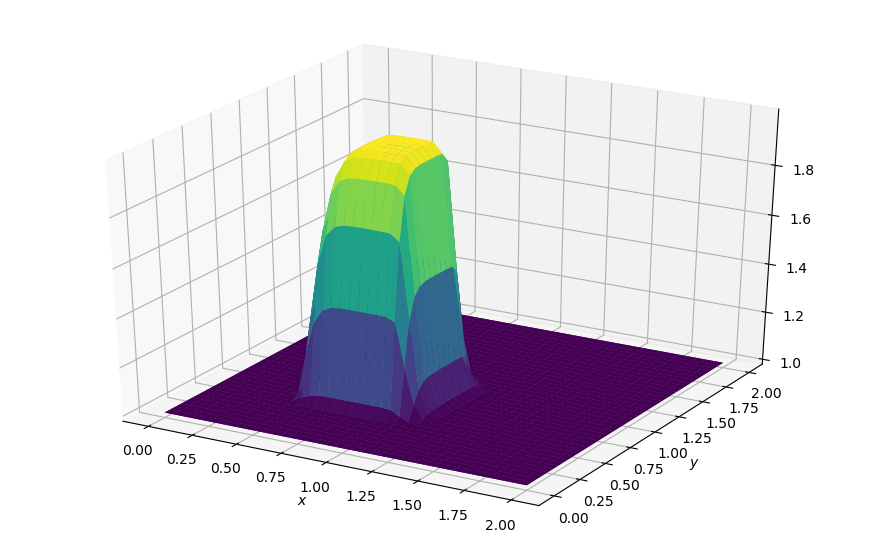

In [5]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)
ax.plot_surface(X, Y, u.T, cmap=cm.viridis, rstride=1, cstride=1)
ax.plot_surface(X, Y, v.T, cmap=cm.viridis, rstride=1, cstride=1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

Material Complementar
-----
***

A lição em vídeo que cobre os detalhes dos Passos 5 ao 8 é **Video Lesson 6**, no YouTube:

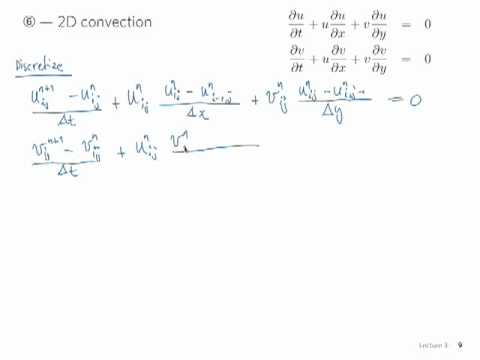

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo('tUg_dE3NXoY')

In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> A célula acima executa o estilo para esse notebook. Nós modificamos o estilo encontrado no GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).